<a href="https://colab.research.google.com/github/branndonm1/branndonm1/blob/main/machine_learning_complexity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
#import packages
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

We generate a set $D$ of 10,000 data points:
$$D := \{(x_i,x_i^2+p): x_i\sim U[-100,100], p\sim U[-50,50], i=1,...1000\}$$
and plot the result.

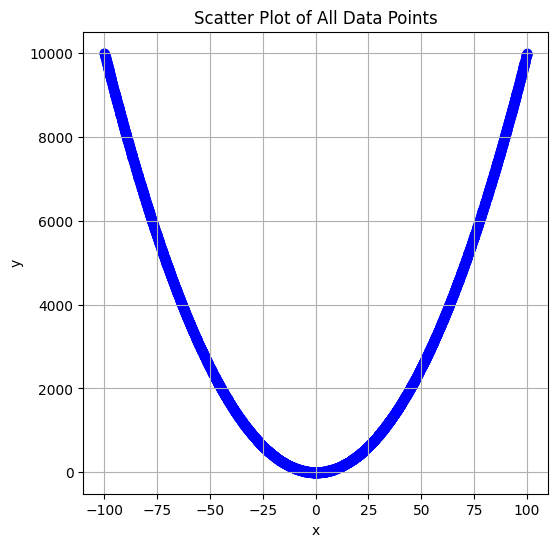

In [207]:
# Generate data points of the form (x,x^2+p) where x~U[-100,100], p~U[-50,50]
num_points = 10000
full_x_values = np.random.uniform(-.01*num_points,.01*num_points, num_points)
full_p_values = np.random.uniform(-10,10, num_points)
full_y_values = full_x_values ** 2 + full_p_values

# Plot the full data
plt.figure(figsize=(6, 6))
plt.scatter(full_x_values, full_y_values, color='blue', alpha=0.5)
plt.title('Scatter Plot of All Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Out of all data in $D$ we take the following sample
$$D\supset S := \{(x,y): 2\leq x\leq 3\}$$
and plot it.


52
52


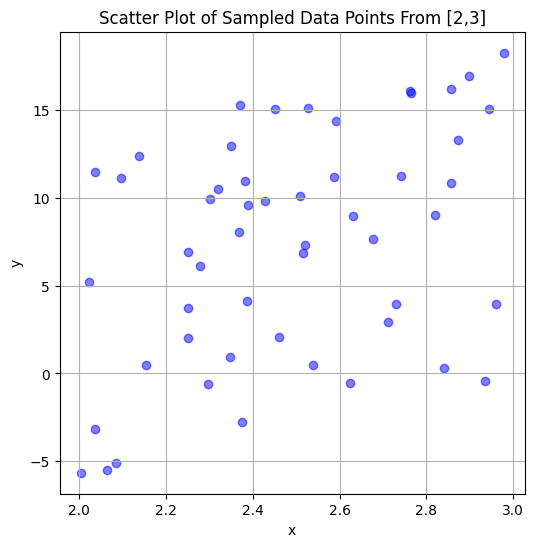

In [208]:
sample_x_values = []
sample_y_values = []

# Prepare data for fitting
for i in range(len(full_x_values)):
  if full_x_values[i] >=2 and full_x_values[i] <=3:
     sample_x_values.append(full_x_values[i])
     sample_y_values.append(full_y_values[i])
print(len(sample_x_values))
print(len(sample_y_values))
# Plot the sample data
plt.figure(figsize=(6, 6))
plt.scatter(sample_x_values, sample_y_values, color='blue', alpha=0.5)
plt.title('Scatter Plot of Sampled Data Points From [2,3]')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

We do linear regression to fit (find $\hat{\theta}$) a model of the form
$$\hat{y}(\theta)=\theta_2\sin(x)+\theta_1\cos(x)+\theta_0$$
but only using samples from $S$. Then we plot the points $$\hat{y}(x,\hat{\theta})$$ for $x\in S$.

theta_opt=(theta_2,theta_1,theta_0)=[6.606121802736336, -12.007042286661834, 0.0]


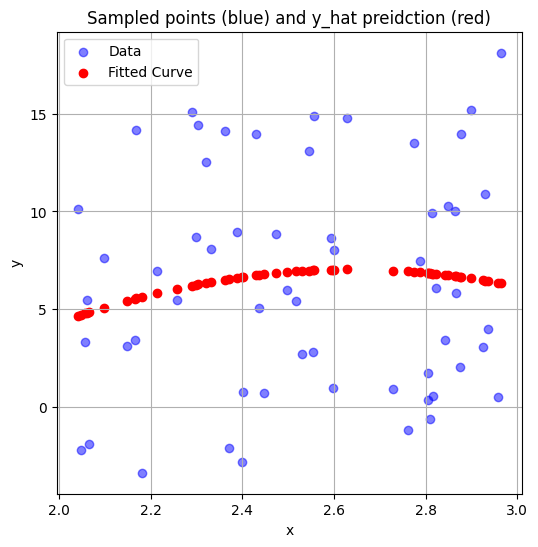

In [177]:
#prep data for fitting
X = np.column_stack((np.sin(sample_x_values), np.cos(sample_x_values), np.ones_like(sample_x_values)))

# Fit the model to find theta_opt
model = LinearRegression()
model.fit(X, sample_y_values)

# Get theta_opt
a, b, c = model.coef_
c_intercept = model.intercept_

# Generate points for the  y_hat(theta_opt)
x_range = [x for x in sample_x_values]
X_range = np.column_stack((np.sin(x_range), np.cos(x_range), np.ones_like(x_range)))
trig_y_pred = np.dot(X_range, [a, b, c]) + c_intercept

print("theta_opt=(theta_2,theta_1,theta_0)="+str([a,b,c]))

# Plot the curve y_hat(theta_opt)
plt.figure(figsize=(6, 6))
plt.scatter(sample_x_values, sample_y_values, color='blue', alpha=0.5, label='Data')
plt.scatter(x_range, trig_y_pred, color='red', label='Fitted Curve')
plt.title('Sampled points (blue) and y_hat preidction (red)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

We define for $(x_i,\cdot)\in D$ we define $$\hat{y}_i:=\hat{y}(\theta, x_i).$$
For the metric $$L(\hat{y}_i, y_i)=(\hat{y}_i - y_i)^2$$
we will approximate minimums $x_i$ by findings the $(x_i,y_i)\in D$ (notes this is done over all of $D$) such that
$$L(\hat{y}_i,y_i)\leq\epsilon$$
for some threshold $\epsilon$. First we extend the approximation $\hat{y}(\hat{\theta})$ to the whole set $D$ that we originally started with by taking every input $x_i$ and evaluating it under the map $\hat{y}(\hat{\theta}).$ We plot the resulting data points as well.

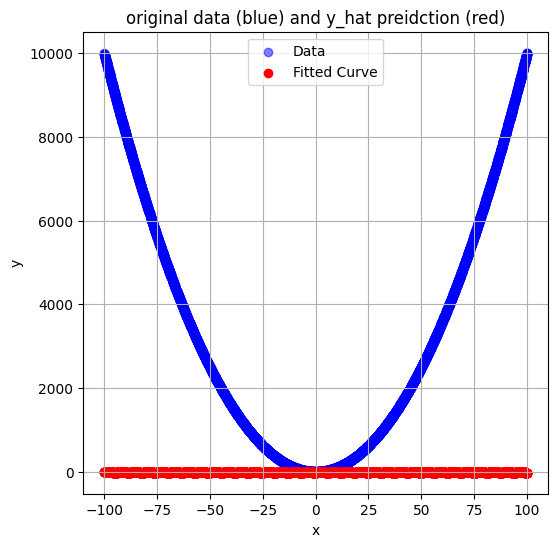

In [178]:
# Generate full points for the  y_hat(theta_opt)
full_X_pred = np.column_stack((np.sin(full_x_values), np.cos(full_x_values), np.ones_like(full_x_values)))
full_trig_y_pred = np.dot(full_X_pred, [a, b, c]) + c_intercept

# Plot the curve y_hat(theta_opt)
plt.figure(figsize=(6, 6))
plt.scatter(full_x_values, full_y_values, color='blue', alpha=0.5, label='Data')
plt.scatter(full_x_values, full_trig_y_pred, color='red', label='Fitted Curve')
plt.title('original data (blue) and y_hat preidction (red)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Now we find some minset $$M:=\{x_i: L(\hat{y}_i,y_i) \leq \epsilon\}$$

In [179]:
#define loss threshold
ep = .1
trig_minset = []

for i in range(len(full_x_values)):
  if (full_y_values[i]-full_trig_y_pred[i])**2 <= ep:
    trig_minset.append(full_x_values[i])

print(trig_minset)

[1.2472415747998014, -3.628356943241087, -3.7389931924569453, -2.9824858623212407, -3.3412669513846396]


Now we do a centered difference approximation for $\frac{\partial^2 L}{\partial x^2}(x_m)$ to approximate the second derivative at every min point $x_m \in M$. For some small $h$ we take $$\frac{\partial^2 L}{\partial x^2}|_{x_i}\approx\frac{L(\hat{y}_i(\hat{\theta}, x_i-h),y_i)-2L(\hat{y}_i(\hat{\theta}, x_i),y_i)+L(\hat{y}_i(\hat{\theta}, x_i+h),y_i)}{h^2}$$

We generate the predictions at the h steps first below.

In [180]:
h=.5

# Generate points for the  y_hat(theta_opt) at x+h
minset_x_plus_range = [x+h for x in trig_minset]
minset_X_plus_range = np.column_stack((np.sin(minset_x_plus_range), np.cos(minset_x_plus_range), np.ones_like(minset_x_plus_range)))
minset_plus_trig_y_pred = np.dot(minset_X_plus_range, [a, b, c]) + c_intercept

# Generate points for the  y_hat(theta_opt) at x-h
minset_x_minus_range = [x+h for x in trig_minset]
minset_X_minus_range = np.column_stack((np.sin(minset_x_minus_range), np.cos(minset_x_minus_range), np.ones_like(minset_x_plus_range)))
minset_minus_trig_y_pred = np.dot(minset_X_minus_range, [a, b, c]) + c_intercept

print(minset_x_minus_range)
print(minset_minus_trig_y_pred)

[1.7472415747998014, -3.128356943241087, -3.2389931924569453, -2.4824858623212407, -2.8412669513846396]
[ 1.9406548   5.24804715  5.92204637 -1.22412889  2.84480215]


We compute the derivatives $\frac{\partial^2 L}{\partial x^2}(x_m)$ below.

In [181]:
second_deriv_at_mins=[]

for i in range(len(trig_minset)):
  second_deriv_at_mins.append((minset_minus_trig_y_pred[i]-2*trig_y_pred[i]+ minset_plus_trig_y_pred[i])/(h ** 2))

print(second_deriv_at_mins)

[-37.64307498892502, -14.191850360111442, -4.276270827137608, -47.11154522761353, -30.10179093943996]


We finally compute the complexity $$C(\hat{\theta}) = -.5\log(\sum_{x_m \in M} |\frac{\partial^2 L}{\partial x^2}(x_m)|).$$

In [182]:
complexity = -.5*math.log(sum([abs(x) for x in second_deriv_at_mins]))
print(complexity)

-2.4463931244177464


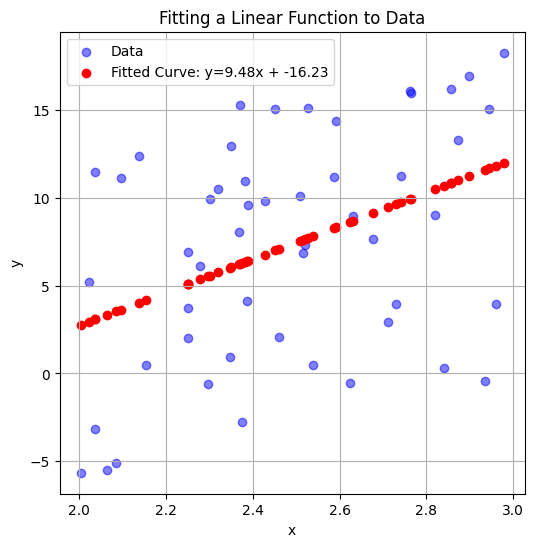

In [209]:
# Reshape x_values for sklearn
x_values_reshaped = [[x] for x in sample_x_values]

# Fit the model
model = LinearRegression()
model.fit(x_values_reshaped, sample_y_values)

# Get theta_opt
a = model.coef_[0]
b = model.intercept_

# Generate predicted y_hat(theta_opt)
x_range = [x for x in sample_x_values]
y_pred = [a * x + b for x in x_range]

# Plot the fitted curve
plt.figure(figsize=(6, 6))
plt.scatter(sample_x_values, sample_y_values, color='blue', alpha=0.5, label='Data')
plt.scatter(x_range, y_pred, color='red', label=f'Fitted Curve: y={a:.2f}x + {b:.2f}')
plt.title('Fitting a Linear Function to Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


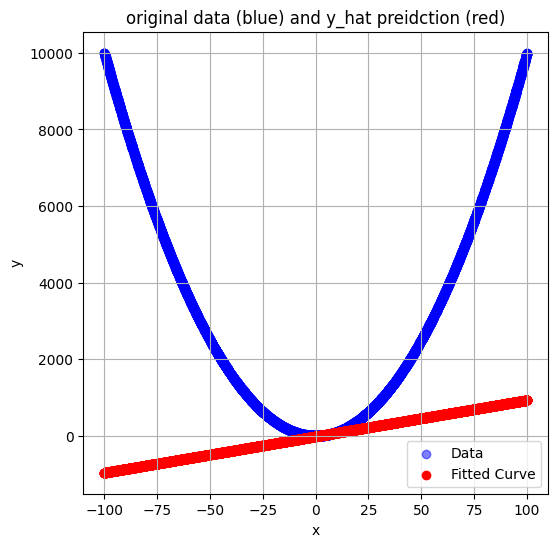

In [210]:
# Generate full points for the  y_hat(theta_opt)
full_linear_y_pred = [a*x+b for x in full_x_values]

# Plot the curve y_hat(theta_opt)
plt.figure(figsize=(6, 6))
plt.scatter(full_x_values, full_y_values, color='blue', alpha=0.5, label='Data')
plt.scatter(full_x_values, full_linear_y_pred, color='red', label='Fitted Curve')
plt.title('original data (blue) and y_hat preidction (red)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [211]:
#define loss threshold
ep = .1
linear_minset = []

for i in range(len(full_x_values)):
  if (full_y_values[i]-full_linear_y_pred[i])**2 <= ep:
    linear_minset.append(full_x_values[i])

print(linear_minset)

[5.944497843637578, 0.7817549445916114, 6.713850225431557, 8.095318407261828, 7.087551396084251, 7.4755467600544705, 4.121414997280496, 3.3802873817123924, 7.11022917980651, 2.856721023240439, 4.397134420627353, 6.038176973847982, 7.0317440535526, 2.630444602133423, 7.624007168259666, 6.582986106863984, 6.534267487668785, 3.415768721724362]


In [212]:
h=.5

# Generate points for the  y_hat(theta_opt) at x+h
minset_x_plus_range = [x+h for x in linear_minset]
minset_plus_linear_y_pred = [a*x+b for x in linear_minset]

# Generate points for the  y_hat(theta_opt) at x-h
minset_x_minus_range = [x-h for x in linear_minset]
minset_minus_linear_y_pred = [a*x+b for x in linear_minset]

print(minset_x_minus_range)
print(minset_minus_linear_y_pred)

[5.444497843637578, 0.28175494459161143, 6.213850225431557, 7.5953184072618285, 6.587551396084251, 6.9755467600544705, 3.621414997280496, 2.8802873817123924, 6.61022917980651, 2.356721023240439, 3.897134420627353, 5.538176973847982, 6.5317440535526, 2.130444602133423, 7.124007168259666, 6.082986106863984, 6.034267487668785, 2.915768721724362]
[40.10779819141028, -8.820382092071128, 47.399079739615544, 60.49148538099958, 50.94070840627293, 54.61780554023983, 22.83013631234107, 15.806345607155304, 51.155629565836676, 10.844419422061833, 25.443175527535278, 40.995611019080116, 50.411812861806595, 8.699959831042698, 56.02478972668176, 46.15885854109406, 45.69714401651731, 16.142608216925385]


In [213]:
second_deriv_at_mins=[]

for i in range(len(linear_minset)):
  second_deriv_at_mins.append((minset_minus_linear_y_pred[i]-2*y_pred[i]+ minset_plus_linear_y_pred[i])/(h ** 2))

print(second_deriv_at_mins)

[272.5464396558509, -111.43123591033563, 284.61462946916447, 435.86090357073533, 382.90797072538646, 408.64714067051864, 95.95529980549449, 92.959238214001, 359.5224611856055, 40.73395323608813, 137.25405109085133, 254.89801417327843, 358.96074363274613, 9.21623387246089, 398.0333943153461, 307.5257546780962, 280.0073344048783, 53.49328426292993]


In [214]:
complexity = -.5*math.log(sum([abs(x) for x in second_deriv_at_mins]))
print(complexity)

-4.181387514244555


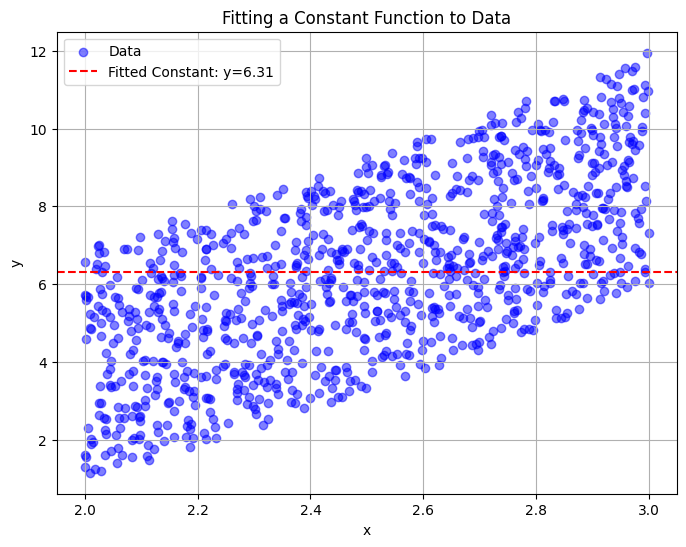

In [ ]:
# Take y_hat(theta_opt) = average over y's
constant_value = np.mean(y_values)

# Plot the fitted constant line
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color='blue', alpha=0.5, label='Data')
plt.axhline(y=constant_value, color='red', linestyle='--', label=f'Fitted Constant: y={constant_value:.2f}')
plt.title('Fitting a Constant Function to Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()